In [89]:
import pandas as pd
from bs4 import BeautifulSoup
import urllib.request as re
url='https://eprocure.gov.in/cppp/latestactivecorrigendumsnew/cpppdata'
html=re.urlopen(url)
soup=BeautifulSoup(html,'lxml')

# gem cara data:  https://mkp.gem.gov.in/25101500-cars-version-2-/search#/?page=1&_xhr=1
# hotel project =https://www.youtube.com/watch?v=obJZ1rB7TKc
# airflight project with sql & python/panda : https://www.youtube.com/watch?v=LcMjsqZiSjY

In [90]:
list=[]
tr_row=soup.find('tr')
#print(tr_row[0])
th_data=tr_row.findAll('th')
for i in th_data:
  list.append(i.text)
print(list)


['Sl.No', 'e-Published Date', 'Bid Submission Closing Date', 'Tender Opening Date', 'Title/Ref.No./Tender Id', 'Organisation Name', 'Corrigendum']


In [91]:
data=pd.DataFrame(columns=list)
data


,Sl.No,e-Published Date,Bid Submission Closing Date,Tender Opening Date,Title/Ref.No./Tender Id,Organisation Name,Corrigendum


In [92]:
# 1st method
# for single page

rows=soup.findAll('tr')[1:]
for i in range(0,10):
  list2=[]
  row=rows[i].findAll('td')
  for k in row:
    td_row=k.text.replace(',','')
    #print(td_row)
    list2.append(td_row)
  #print(list2)
  data.loc[i]=list2
data

,Sl.No,e-Published Date,Bid Submission Closing Date,Tender Opening Date,Title/Ref.No./Tender Id,Organisation Name,Corrigendum
0,1.,01-Sep-2023 06:00 PM,12-Sep-2023 12:00 PM,13-Sep-2023 12:00 PM,DE/CNTx/KPR/T-2/Vol-14/110 (KM-1) dtd 01.09.23...,Bharat Sanchar Nigam Limited (Govt of India En...,
1,2.,01-Sep-2023 05:00 PM,08-Sep-2023 01:00 PM,08-Sep-2023 02:00 PM,Providing laying jointing testing of 150 mm ...,SJVN Ltd,
2,3.,31-Aug-2023 06:30 PM,02-Sep-2023 02:00 PM,02-Sep-2023 02:30 PM,Unpacking of Panels/TGPWCC0006/2023_BHEL_28141_1,Bharat Heavy Electricals Limited,
3,4.,31-Aug-2023 06:19 PM,04-Sep-2023 03:15 PM,04-Sep-2023 03:30 PM,119-EEE-SJHED-2023-24-AEE-IV/119-EEE-SJHED-202...,Central Public Works Department (CPWD),
4,5.,31-Aug-2023 06:08 PM,04-Sep-2023 03:05 PM,04-Sep-2023 03:30 PM,118-EEE-SJHED-2023-24-AEE-IV/118-EEE-SJHED-202...,Central Public Works Department (CPWD),
5,6.,31-Aug-2023 05:23 PM,08-Sep-2023 03:00 PM,08-Sep-2023 03:30 PM,88/EE(E)/GCED/2023-24/88/EE(E)/GCED/2023-24/52550,Central Public Works Department (CPWD),
6,7.,31-Aug-2023 05:00 PM,21-Sep-2023 03:00 PM,22-Sep-2023 03:00 PM,Licence for Sim Card Kiosk inside Internationa...,Airports Authority of India,
7,8.,31-Aug-2023 04:51 PM,14-Sep-2023 03:00 PM,14-Sep-2023 03:30 PM,05/EE-cum-SM(C)-1/DPC-1/2023-24/05/EE-cum-SM(C...,Central Public Works Department (CPWD),
8,9.,31-Aug-2023 03:00 PM,09-Sep-2023 11:00 AM,09-Sep-2023 03:00 PM,B9AWS00069/PIPE BEND/B9AWS00069/ PIPE BEND/202...,Bharat Heavy Electricals Limited,
9,10.,31-Aug-2023 12:00 PM,09-Sep-2023 11:00 AM,09-Sep-2023 03:00 PM,Machining of TOOL CUTTERS/B9AWS00160/2023_BHEL...,Bharat Heavy Electricals Limited,


In [93]:
# 2nd method
# for single page

In [94]:
import pandas as pd
from bs4 import BeautifulSoup
import urllib.request as re
url='https://eprocure.gov.in/cppp/latestactivecorrigendumsnew/cpppdata'
html=re.urlopen(url)
soup=BeautifulSoup(html,'lxml')


In [95]:
#for N in url_list:
rows=soup.findAll('tr')[1:]
list2=[]
for i in rows:
    td_data=i.findAll('td')
    list1=[]
    for k in td_data:
      #print(k.text.replace(',',''))
      z=k.text.replace(',','')
      list1.append(z)
    #print(list1)
    list2.append(list1)
print(list2)


[['1.', '01-Sep-2023 06:00 PM', '12-Sep-2023 12:00 PM', '13-Sep-2023 12:00 PM', 'DE/CNTx/KPR/T-2/Vol-14/110 (KM-1) dtd 01.09.23/DE/CNTx/KPR/T-2/Vol-14/110 (KM-1) dtd 01.09.23/2023_BSNL_166358_1', 'Bharat Sanchar Nigam Limited (Govt of India Enterprise)', ''], ['2.', '01-Sep-2023 05:00 PM', '08-Sep-2023 01:00 PM', '08-Sep-2023 02:00 PM', 'Providing  laying jointing  testing of 150 mm dia having outer dia 168.3 mm plain ended GI pipes (Medium duty) IS 1239 with bevelled edge i.c testing and commissioning and cost of Jointing with Butt welding as per relevant BIS specifications (Leak/PCD-2834/2023_SJVNL_722850_2', 'SJVN  Ltd', ''], ['3.', '31-Aug-2023 06:30 PM', '02-Sep-2023 02:00 PM', '02-Sep-2023 02:30 PM', 'Unpacking of Panels/TGPWCC0006/2023_BHEL_28141_1', 'Bharat Heavy Electricals Limited', ''], ['4.', '31-Aug-2023 06:19 PM', '04-Sep-2023 03:15 PM', '04-Sep-2023 03:30 PM', '119-EEE-SJHED-2023-24-AEE-IV/119-EEE-SJHED-2023-24-AEE-IV/52519', 'Central Public Works Department (CPWD)', '']

In [96]:
rows=soup.findAll('tr')[1:]
list2=[]
for i in rows:
    td_data=i.findAll('td')
    list1=[]
    for k in td_data:
      #print(k.text.replace(',',''))
      z=k.text.replace(',','')
      list1.append(z)
    #print(list1)
    list2.append(list1)
  #print(list2)
data2=pd.DataFrame(list2)
data2

,0,1,2,3,4,5,6
0,1.,01-Sep-2023 06:00 PM,12-Sep-2023 12:00 PM,13-Sep-2023 12:00 PM,DE/CNTx/KPR/T-2/Vol-14/110 (KM-1) dtd 01.09.23...,Bharat Sanchar Nigam Limited (Govt of India En...,
1,2.,01-Sep-2023 05:00 PM,08-Sep-2023 01:00 PM,08-Sep-2023 02:00 PM,Providing laying jointing testing of 150 mm ...,SJVN Ltd,
2,3.,31-Aug-2023 06:30 PM,02-Sep-2023 02:00 PM,02-Sep-2023 02:30 PM,Unpacking of Panels/TGPWCC0006/2023_BHEL_28141_1,Bharat Heavy Electricals Limited,
3,4.,31-Aug-2023 06:19 PM,04-Sep-2023 03:15 PM,04-Sep-2023 03:30 PM,119-EEE-SJHED-2023-24-AEE-IV/119-EEE-SJHED-202...,Central Public Works Department (CPWD),
4,5.,31-Aug-2023 06:08 PM,04-Sep-2023 03:05 PM,04-Sep-2023 03:30 PM,118-EEE-SJHED-2023-24-AEE-IV/118-EEE-SJHED-202...,Central Public Works Department (CPWD),
5,6.,31-Aug-2023 05:23 PM,08-Sep-2023 03:00 PM,08-Sep-2023 03:30 PM,88/EE(E)/GCED/2023-24/88/EE(E)/GCED/2023-24/52550,Central Public Works Department (CPWD),
6,7.,31-Aug-2023 05:00 PM,21-Sep-2023 03:00 PM,22-Sep-2023 03:00 PM,Licence for Sim Card Kiosk inside Internationa...,Airports Authority of India,
7,8.,31-Aug-2023 04:51 PM,14-Sep-2023 03:00 PM,14-Sep-2023 03:30 PM,05/EE-cum-SM(C)-1/DPC-1/2023-24/05/EE-cum-SM(C...,Central Public Works Department (CPWD),
8,9.,31-Aug-2023 03:00 PM,09-Sep-2023 11:00 AM,09-Sep-2023 03:00 PM,B9AWS00069/PIPE BEND/B9AWS00069/ PIPE BEND/202...,Bharat Heavy Electricals Limited,
9,10.,31-Aug-2023 12:00 PM,09-Sep-2023 11:00 AM,09-Sep-2023 03:00 PM,Machining of TOOL CUTTERS/B9AWS00160/2023_BHEL...,Bharat Heavy Electricals Limited,


In [97]:
###################### for All row

In [98]:
url_list=[]
for N in range(0,20):
  url='https://eprocure.gov.in/cppp/latestactivecorrigendumsnew/cpppdata?page='+str(N)
  url_list.append(url)
print(url_list)

['https://eprocure.gov.in/cppp/latestactivecorrigendumsnew/cpppdata?page=0', 'https://eprocure.gov.in/cppp/latestactivecorrigendumsnew/cpppdata?page=1', 'https://eprocure.gov.in/cppp/latestactivecorrigendumsnew/cpppdata?page=2', 'https://eprocure.gov.in/cppp/latestactivecorrigendumsnew/cpppdata?page=3', 'https://eprocure.gov.in/cppp/latestactivecorrigendumsnew/cpppdata?page=4', 'https://eprocure.gov.in/cppp/latestactivecorrigendumsnew/cpppdata?page=5', 'https://eprocure.gov.in/cppp/latestactivecorrigendumsnew/cpppdata?page=6', 'https://eprocure.gov.in/cppp/latestactivecorrigendumsnew/cpppdata?page=7', 'https://eprocure.gov.in/cppp/latestactivecorrigendumsnew/cpppdata?page=8', 'https://eprocure.gov.in/cppp/latestactivecorrigendumsnew/cpppdata?page=9', 'https://eprocure.gov.in/cppp/latestactivecorrigendumsnew/cpppdata?page=10', 'https://eprocure.gov.in/cppp/latestactivecorrigendumsnew/cpppdata?page=11', 'https://eprocure.gov.in/cppp/latestactivecorrigendumsnew/cpppdata?page=12', 'https:/

In [99]:
list2=[]
for N in url_list:
  html=re.urlopen(N)
  soup=BeautifulSoup(html,'lxml')
  rows=soup.findAll('tr')[1:]
  for i in rows:
      td_data=i.findAll('td')
      list1=[]
      for k in td_data:
        #print(k.text.replace(',',''))
        z=k.text.replace(',','')
        list1.append(z)
      #print(list1)
      list2.append(list1)
    #print(list2)
data2=pd.DataFrame(list2)
data2

,0,1,2,3,4,5,6
0,1.,01-Sep-2023 06:00 PM,12-Sep-2023 12:00 PM,13-Sep-2023 12:00 PM,DE/CNTx/KPR/T-2/Vol-14/110 (KM-1) dtd 01.09.23...,Bharat Sanchar Nigam Limited (Govt of India En...,
1,2.,01-Sep-2023 05:00 PM,08-Sep-2023 01:00 PM,08-Sep-2023 02:00 PM,Providing laying jointing testing of 150 mm ...,SJVN Ltd,
2,3.,31-Aug-2023 06:30 PM,02-Sep-2023 02:00 PM,02-Sep-2023 02:30 PM,Unpacking of Panels/TGPWCC0006/2023_BHEL_28141_1,Bharat Heavy Electricals Limited,
3,4.,31-Aug-2023 06:19 PM,04-Sep-2023 03:15 PM,04-Sep-2023 03:30 PM,119-EEE-SJHED-2023-24-AEE-IV/119-EEE-SJHED-202...,Central Public Works Department (CPWD),
4,5.,31-Aug-2023 06:08 PM,04-Sep-2023 03:05 PM,04-Sep-2023 03:30 PM,118-EEE-SJHED-2023-24-AEE-IV/118-EEE-SJHED-202...,Central Public Works Department (CPWD),
...,...,...,...,...,...,...,...
195,186.,24-Aug-2023 06:00 PM,05-Sep-2023 02:00 PM,05-Sep-2023 04:00 PM,SUPPLY OF 7 FEET GALVANIZED IRON CHAIN/H012300...,Bharat Heavy Electricals Limited,
196,187.,24-Aug-2023 06:00 PM,15-Sep-2023 06:00 PM,18-Sep-2023 12:00 PM,REPAIR TO TILING BRICK WORK JOINERY PLUMBING W...,E-IN-C BRANCH - MILITARY ENGINEER SERVICES,
197,188.,24-Aug-2023 06:00 PM,12-Sep-2023 06:00 PM,14-Sep-2023 10:00 AM,REPAIR TO FLOORING FALSE CEILING AND ALLIED WO...,E-IN-C BRANCH - MILITARY ENGINEER SERVICES,
198,189.,24-Aug-2023 06:00 PM,14-Sep-2023 02:00 PM,14-Sep-2023 02:30 PM,Development Customization Operation And Mainte...,Election Commission of India,


In [100]:
data2.columns=list
data2

,Sl.No,e-Published Date,Bid Submission Closing Date,Tender Opening Date,Title/Ref.No./Tender Id,Organisation Name,Corrigendum
0,1.,01-Sep-2023 06:00 PM,12-Sep-2023 12:00 PM,13-Sep-2023 12:00 PM,DE/CNTx/KPR/T-2/Vol-14/110 (KM-1) dtd 01.09.23...,Bharat Sanchar Nigam Limited (Govt of India En...,
1,2.,01-Sep-2023 05:00 PM,08-Sep-2023 01:00 PM,08-Sep-2023 02:00 PM,Providing laying jointing testing of 150 mm ...,SJVN Ltd,
2,3.,31-Aug-2023 06:30 PM,02-Sep-2023 02:00 PM,02-Sep-2023 02:30 PM,Unpacking of Panels/TGPWCC0006/2023_BHEL_28141_1,Bharat Heavy Electricals Limited,
3,4.,31-Aug-2023 06:19 PM,04-Sep-2023 03:15 PM,04-Sep-2023 03:30 PM,119-EEE-SJHED-2023-24-AEE-IV/119-EEE-SJHED-202...,Central Public Works Department (CPWD),
4,5.,31-Aug-2023 06:08 PM,04-Sep-2023 03:05 PM,04-Sep-2023 03:30 PM,118-EEE-SJHED-2023-24-AEE-IV/118-EEE-SJHED-202...,Central Public Works Department (CPWD),
...,...,...,...,...,...,...,...
195,186.,24-Aug-2023 06:00 PM,05-Sep-2023 02:00 PM,05-Sep-2023 04:00 PM,SUPPLY OF 7 FEET GALVANIZED IRON CHAIN/H012300...,Bharat Heavy Electricals Limited,
196,187.,24-Aug-2023 06:00 PM,15-Sep-2023 06:00 PM,18-Sep-2023 12:00 PM,REPAIR TO TILING BRICK WORK JOINERY PLUMBING W...,E-IN-C BRANCH - MILITARY ENGINEER SERVICES,
197,188.,24-Aug-2023 06:00 PM,12-Sep-2023 06:00 PM,14-Sep-2023 10:00 AM,REPAIR TO FLOORING FALSE CEILING AND ALLIED WO...,E-IN-C BRANCH - MILITARY ENGINEER SERVICES,
198,189.,24-Aug-2023 06:00 PM,14-Sep-2023 02:00 PM,14-Sep-2023 02:30 PM,Development Customization Operation And Mainte...,Election Commission of India,


In [101]:
# Create data file

data2.to_csv("gem.csv")

In [102]:
                                                #  Data Analytics of above data frame

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [103]:

data2['e-Published Date']=pd.to_datetime(data2['e-Published Date'])

data2['Bid Submission Closing Date']=pd.to_datetime(data2['Bid Submission Closing Date'])

In [104]:
month_list=['jan','feb','mar','april','may','june','july','aug','sep','oct','nov','dec']


In [105]:
data2['month_published']=data2['e-Published Date'].apply(lambda x: month_list[x.month-1])
data2.head(5)

,Sl.No,e-Published Date,Bid Submission Closing Date,Tender Opening Date,Title/Ref.No./Tender Id,Organisation Name,Corrigendum,month_published
0,1.,2023-09-01 18:00:00,2023-09-12 12:00:00,13-Sep-2023 12:00 PM,DE/CNTx/KPR/T-2/Vol-14/110 (KM-1) dtd 01.09.23...,Bharat Sanchar Nigam Limited (Govt of India En...,,sep
1,2.,2023-09-01 17:00:00,2023-09-08 13:00:00,08-Sep-2023 02:00 PM,Providing laying jointing testing of 150 mm ...,SJVN Ltd,,sep
2,3.,2023-08-31 18:30:00,2023-09-02 14:00:00,02-Sep-2023 02:30 PM,Unpacking of Panels/TGPWCC0006/2023_BHEL_28141_1,Bharat Heavy Electricals Limited,,aug
3,4.,2023-08-31 18:19:00,2023-09-04 15:15:00,04-Sep-2023 03:30 PM,119-EEE-SJHED-2023-24-AEE-IV/119-EEE-SJHED-202...,Central Public Works Department (CPWD),,aug
4,5.,2023-08-31 18:08:00,2023-09-04 15:05:00,04-Sep-2023 03:30 PM,118-EEE-SJHED-2023-24-AEE-IV/118-EEE-SJHED-202...,Central Public Works Department (CPWD),,aug


In [106]:
data2['month_Due']=data2['Bid Submission Closing Date'].apply(lambda x: month_list[x.month-1])
data2.head(5)

,Sl.No,e-Published Date,Bid Submission Closing Date,Tender Opening Date,Title/Ref.No./Tender Id,Organisation Name,Corrigendum,month_published,month_Due
0,1.,2023-09-01 18:00:00,2023-09-12 12:00:00,13-Sep-2023 12:00 PM,DE/CNTx/KPR/T-2/Vol-14/110 (KM-1) dtd 01.09.23...,Bharat Sanchar Nigam Limited (Govt of India En...,,sep,sep
1,2.,2023-09-01 17:00:00,2023-09-08 13:00:00,08-Sep-2023 02:00 PM,Providing laying jointing testing of 150 mm ...,SJVN Ltd,,sep,sep
2,3.,2023-08-31 18:30:00,2023-09-02 14:00:00,02-Sep-2023 02:30 PM,Unpacking of Panels/TGPWCC0006/2023_BHEL_28141_1,Bharat Heavy Electricals Limited,,aug,sep
3,4.,2023-08-31 18:19:00,2023-09-04 15:15:00,04-Sep-2023 03:30 PM,119-EEE-SJHED-2023-24-AEE-IV/119-EEE-SJHED-202...,Central Public Works Department (CPWD),,aug,sep
4,5.,2023-08-31 18:08:00,2023-09-04 15:05:00,04-Sep-2023 03:30 PM,118-EEE-SJHED-2023-24-AEE-IV/118-EEE-SJHED-202...,Central Public Works Department (CPWD),,aug,sep


In [107]:
# counting on month for tender due
Month_data_due=data2['month_Due'].value_counts().reset_index()
Month_data_due.columns=['month due','count']
Month_data_due

,month due,count
0,sep,199
1,oct,1


[Text(0, 15, '2'),
 Text(0, 15, '2'),
 Text(0, 15, '2'),
 Text(0, 15, '2'),
 Text(0, 15, '2'),
 Text(0, 15, '2'),
 Text(0, 15, '2'),
 Text(0, 15, '2'),
 Text(0, 15, '2'),
 Text(0, 15, '2'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '2'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '2'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '2'),
 Text(0, 15, '2'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '4'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '2'),
 Text(0, 15, '2'),
 Text(0, 15, '1'),
 Text(0, 15, '2'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '4'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15,

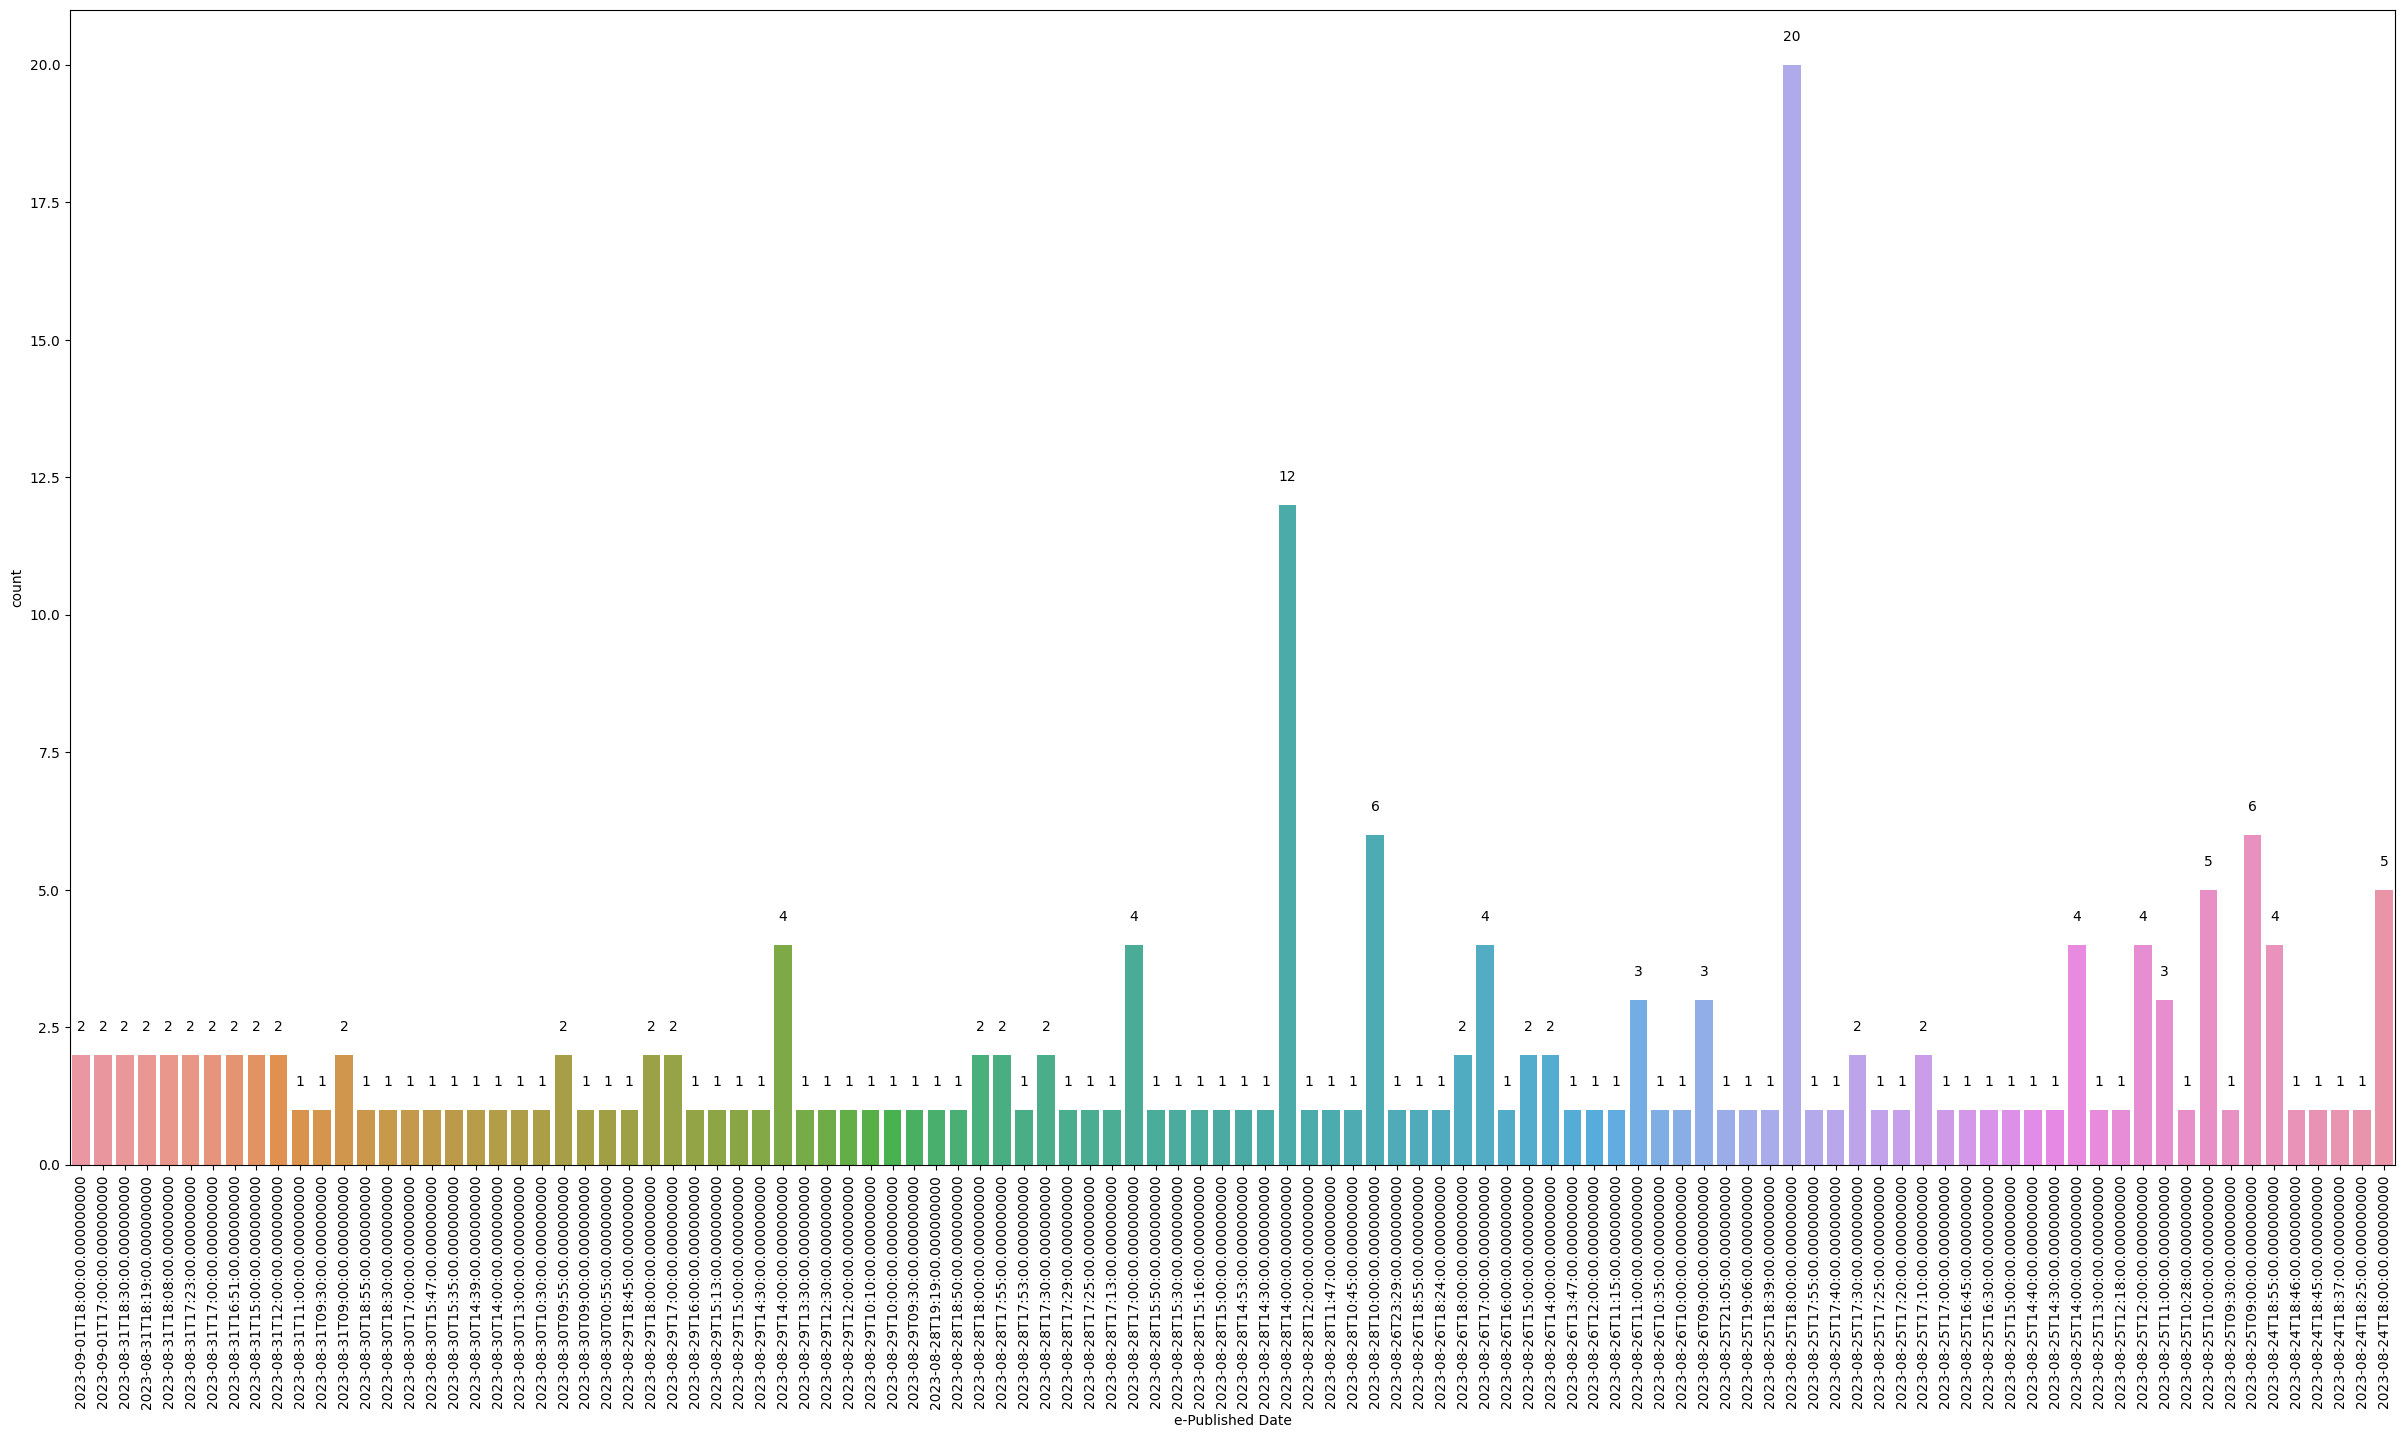

In [108]:
fig,ax=plt.subplots(figsize=(30,15))
ax.tick_params(axis='x',rotation=90)
barchart=sns.countplot(x='e-Published Date',data=data2)
barchart.bar_label(ax.containers[0], label_type='edge', padding=15)

<Axes: xlabel='month due', ylabel='count'>

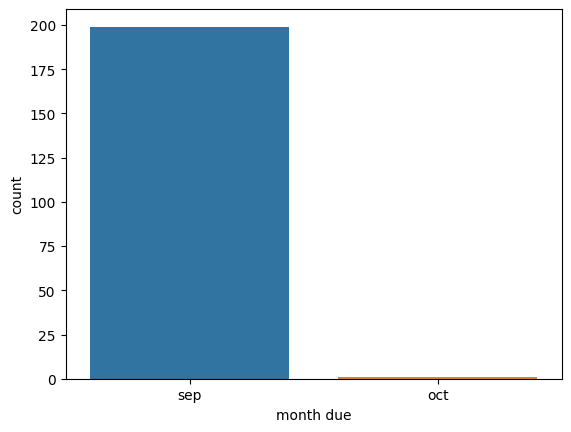

In [109]:
plt.plot(figsize=(2,3))
sns.barplot(x='month due',y='count',data=Month_data_due)

In [110]:
# Unique department list
unique_dept=data2['Organisation Name'].unique().tolist()
print(unique_dept)

['Bharat Sanchar Nigam Limited (Govt of India Enterprise)', 'SJVN  Ltd', 'Bharat Heavy Electricals Limited', 'Central Public Works Department (CPWD)', 'Airports Authority of India', 'Bharat Coking Coal Limited', 'National Rural Roads Development Agency (NRRDA)', 'DGBSFMHA', 'Telecommunications Consultants India Limited', 'NTPC Limited', 'Bharat Electronics Limited', 'IndianOil', 'Delhi University', 'Central Water Commission- DoWR RD and GR', 'E-IN-C BRANCH - MILITARY ENGINEER SERVICES', 'Mormugoa Port Trust', 'Indian Institute of Technology Indore', 'Municipal Corporation of Delhi', 'Department of Heavy Industry', 'Hindustan Petroleum Corporation Limited', 'Rashtriya Chemicals and Fertilizers Ltd.', 'Indian Institute of Technology Guwahati', 'ITI Limited', 'Department of Defence Research and Development', 'Central Coalfields Limited', 'Bharat Petroleum Corporation Limited', 'Indian Institute of Science Education and Research - Kolkata', 'Food Corporation of India', 'Rail Tel Corporatio

In [111]:
# # tender published department vise
Tender_dept=data2['Organisation Name'].value_counts().reset_index()
Tender_dept.columns=['Organisation Name','no of count']
Tender_dept.head(5)

,Organisation Name,no of count
0,E-IN-C BRANCH - MILITARY ENGINEER SERVICES,27
1,Central Public Works Department (CPWD),23
2,Food Corporation of India,21
3,Bharat Sanchar Nigam Limited (Govt of India En...,12
4,IndianOil,10


<Axes: xlabel='Organisation Name', ylabel='no of count'>

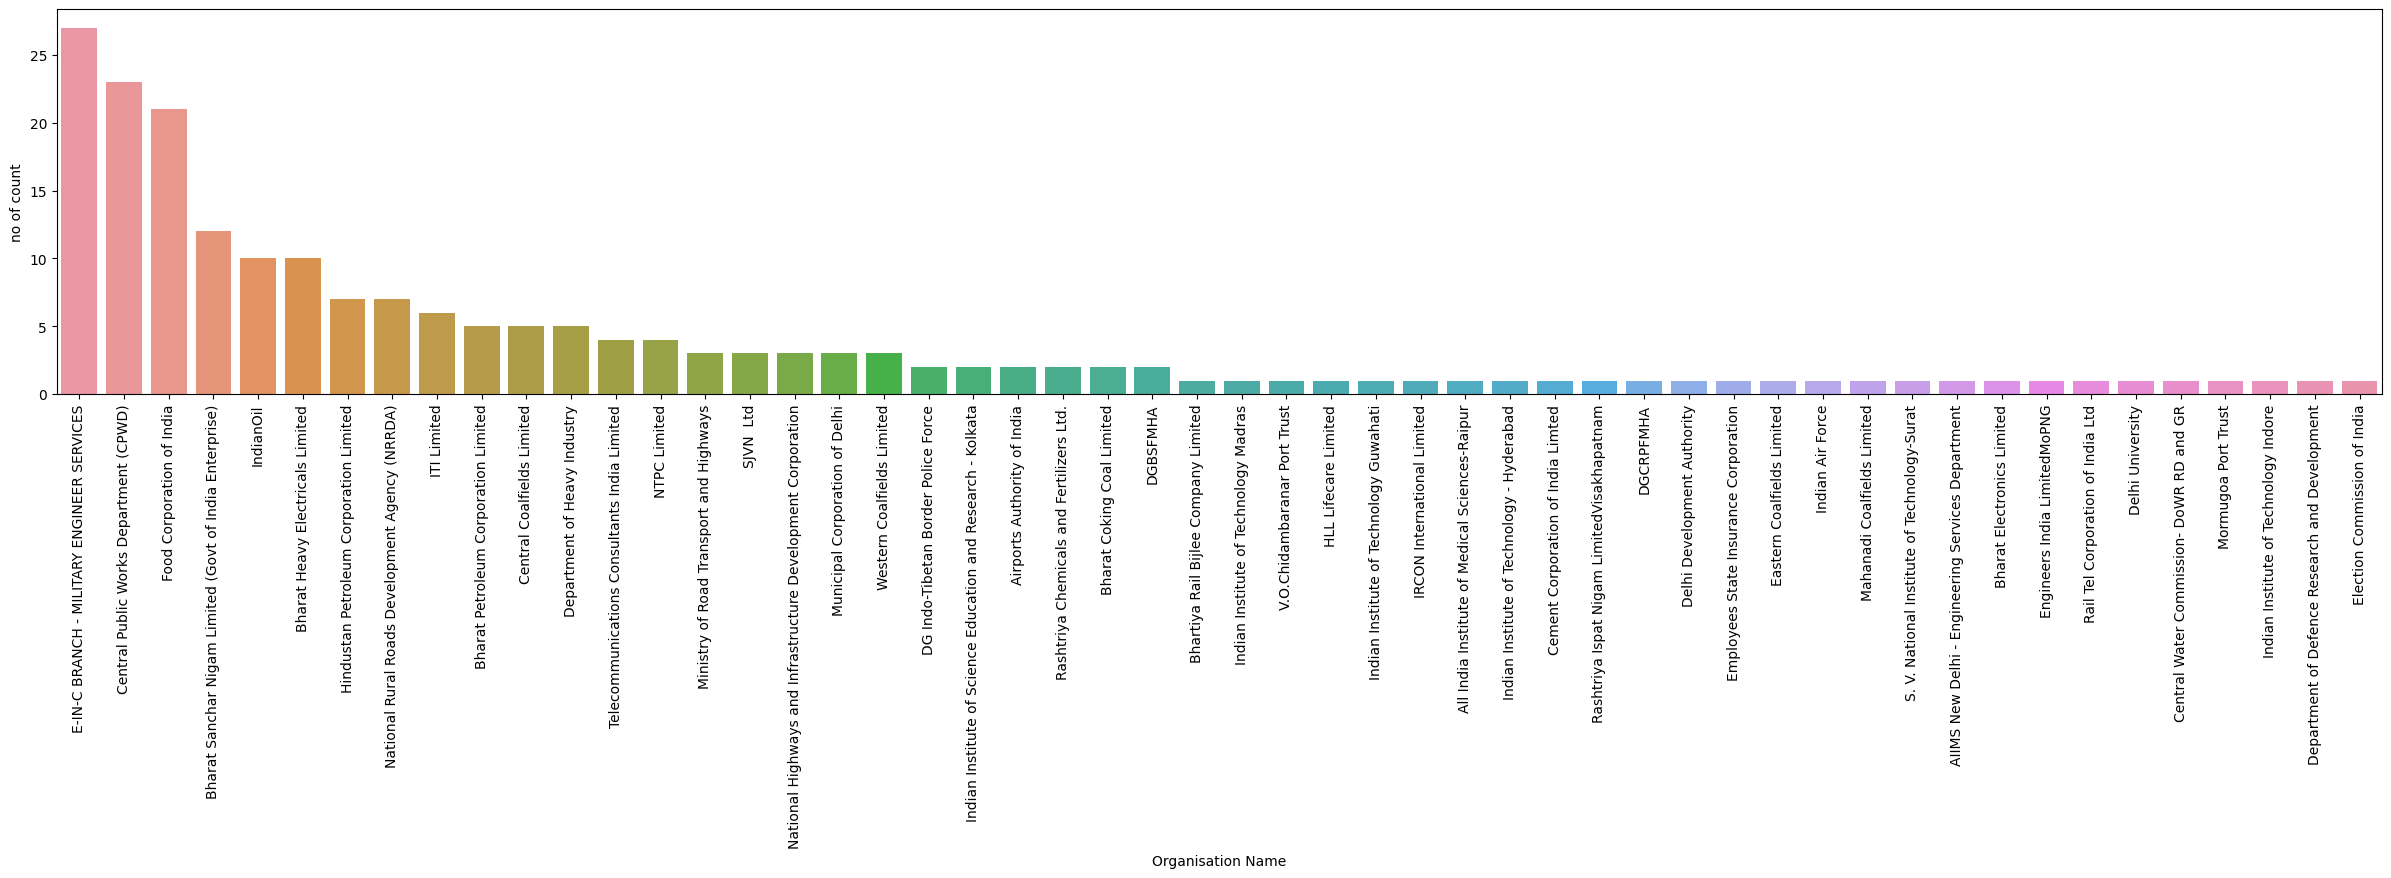

In [112]:
fig,ax=plt.subplots(figsize=(30,5))
ax.tick_params(axis='x',rotation=90)
sns.barplot(x='Organisation Name',y='no of count',data=Tender_dept)



[Text(0, 15, '27'),
 Text(0, 15, '23'),
 Text(0, 15, '21'),
 Text(0, 15, '12'),
 Text(0, 15, '10'),
 Text(0, 15, '10'),
 Text(0, 15, '7'),
 Text(0, 15, '7'),
 Text(0, 15, '6'),
 Text(0, 15, '5'),
 Text(0, 15, '5'),
 Text(0, 15, '5'),
 Text(0, 15, '4'),
 Text(0, 15, '4'),
 Text(0, 15, '3'),
 Text(0, 15, '3'),
 Text(0, 15, '3'),
 Text(0, 15, '3'),
 Text(0, 15, '3'),
 Text(0, 15, '2'),
 Text(0, 15, '2'),
 Text(0, 15, '2'),
 Text(0, 15, '2'),
 Text(0, 15, '2'),
 Text(0, 15, '2'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1')]

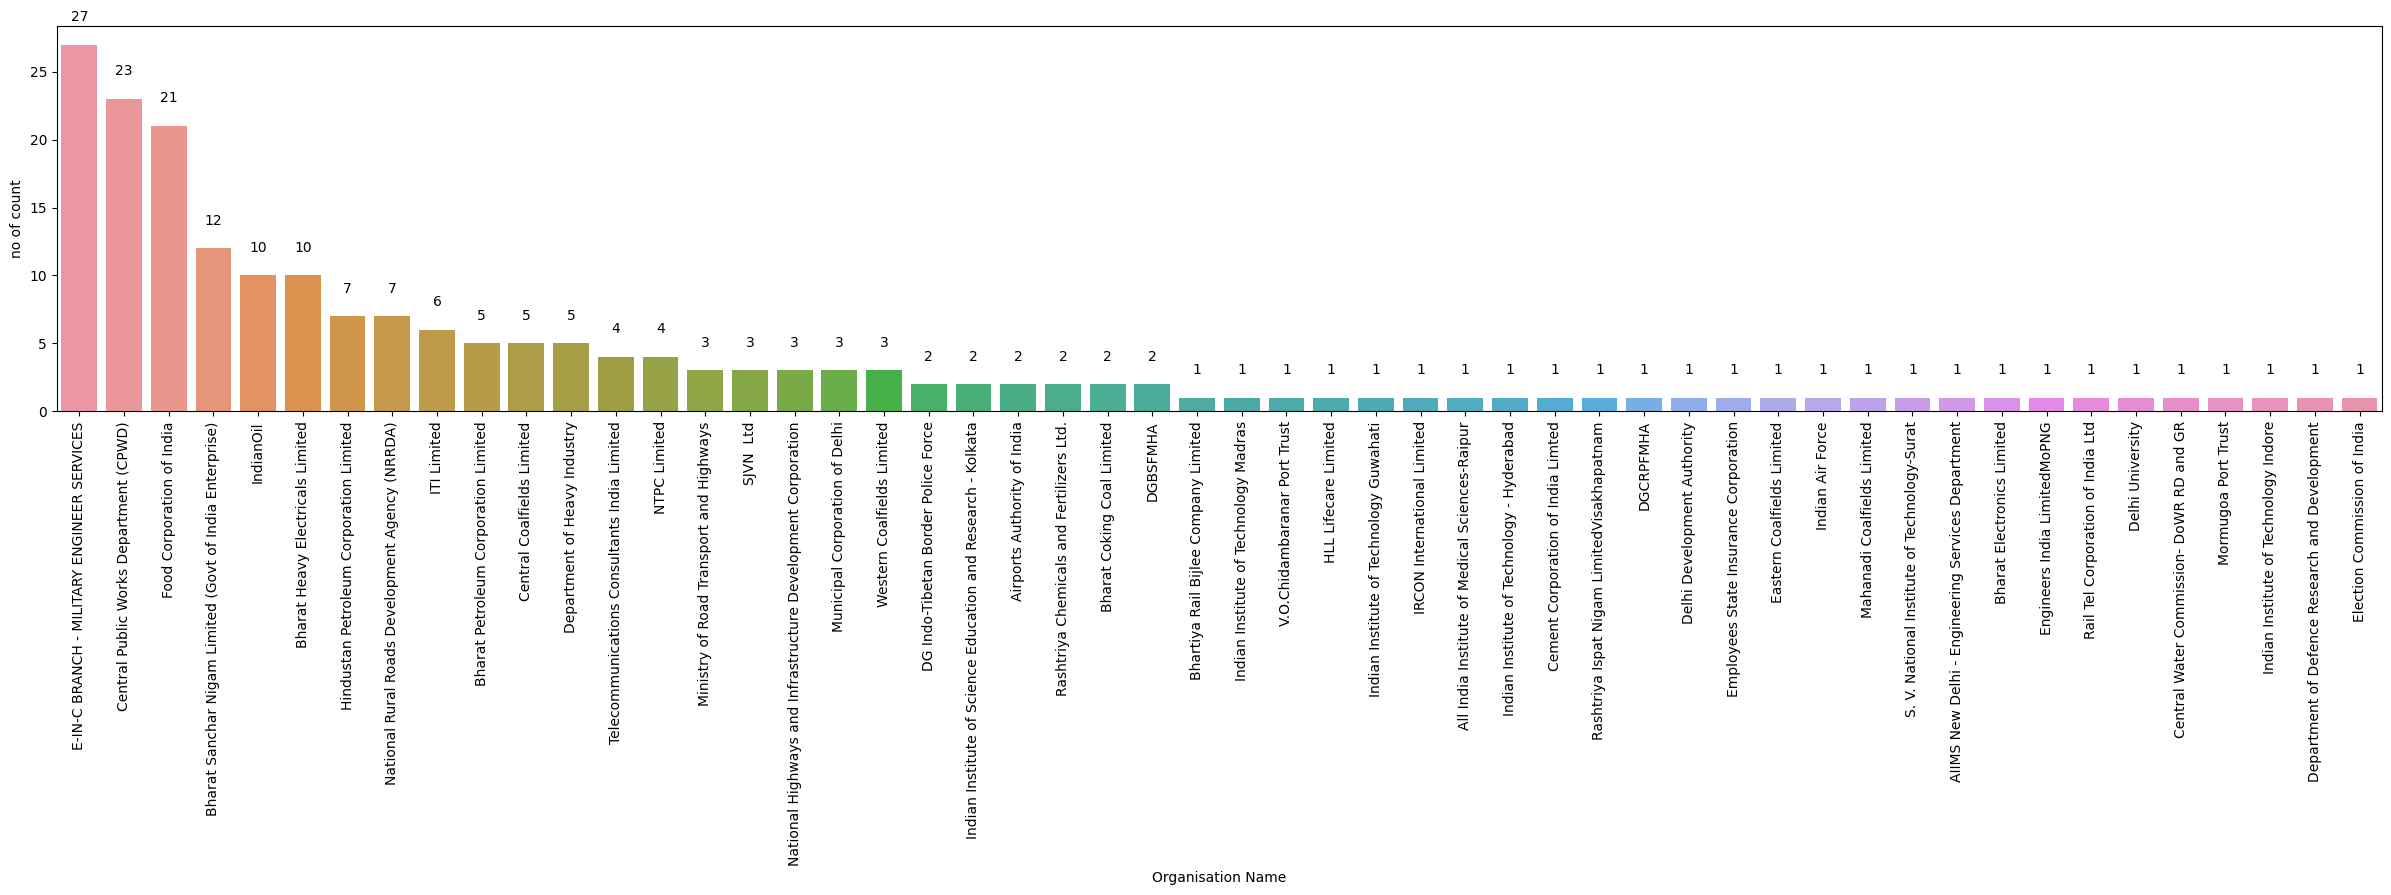

In [113]:
# to mentioned th label on top of bar

fig,ax=plt.subplots(figsize=(30,5))
ax.tick_params(axis='x',rotation=90)
barchart=sns.barplot(x='Organisation Name',y='no of count',data=Tender_dept)
barchart.bar_label(ax.containers[0], label_type='edge', padding=15)

In [114]:
# stack chart

In [115]:
ctab = pd.crosstab(data2['month_Due'], data2['Organisation Name'])
ctab.head(10)

Organisation Name,AIIMS New Delhi - Engineering Services Department,Airports Authority of India,All India Institute of Medical Sciences-Raipur,Bharat Coking Coal Limited,Bharat Electronics Limited,Bharat Heavy Electricals Limited,Bharat Petroleum Corporation Limited,Bharat Sanchar Nigam Limited (Govt of India Enterprise),Bhartiya Rail Bijlee Company Limited,Cement Corporation of India Limted,...,National Highways and Infrastructure Development Corporation,National Rural Roads Development Agency (NRRDA),Rail Tel Corporation of India Ltd,Rashtriya Chemicals and Fertilizers Ltd.,Rashtriya Ispat Nigam LimitedVisakhapatnam,S. V. National Institute of Technology-Surat,SJVN Ltd,Telecommunications Consultants India Limited,V.O.Chidambaranar Port Trust,Western Coalfields Limited
month_Due,,,,,,,,,,,,,,,,,,,,,
oct,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sep,1,2,1,2,1,10,5,12,1,1,...,3,7,1,2,1,1,3,4,1,3


In [116]:
ctab = pd.crosstab(data2['month_Due'], data2['Organisation Name']).apply(lambda x: x/x.sum(), axis=1)
ctab.head(10)

Organisation Name,AIIMS New Delhi - Engineering Services Department,Airports Authority of India,All India Institute of Medical Sciences-Raipur,Bharat Coking Coal Limited,Bharat Electronics Limited,Bharat Heavy Electricals Limited,Bharat Petroleum Corporation Limited,Bharat Sanchar Nigam Limited (Govt of India Enterprise),Bhartiya Rail Bijlee Company Limited,Cement Corporation of India Limted,...,National Highways and Infrastructure Development Corporation,National Rural Roads Development Agency (NRRDA),Rail Tel Corporation of India Ltd,Rashtriya Chemicals and Fertilizers Ltd.,Rashtriya Ispat Nigam LimitedVisakhapatnam,S. V. National Institute of Technology-Surat,SJVN Ltd,Telecommunications Consultants India Limited,V.O.Chidambaranar Port Trust,Western Coalfields Limited
month_Due,,,,,,,,,,,,,,,,,,,,,
oct,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
sep,0.005025,0.01005,0.005025,0.01005,0.005025,0.050251,0.025126,0.060302,0.005025,0.005025,...,0.015075,0.035176,0.005025,0.01005,0.005025,0.005025,0.015075,0.020101,0.005025,0.015075


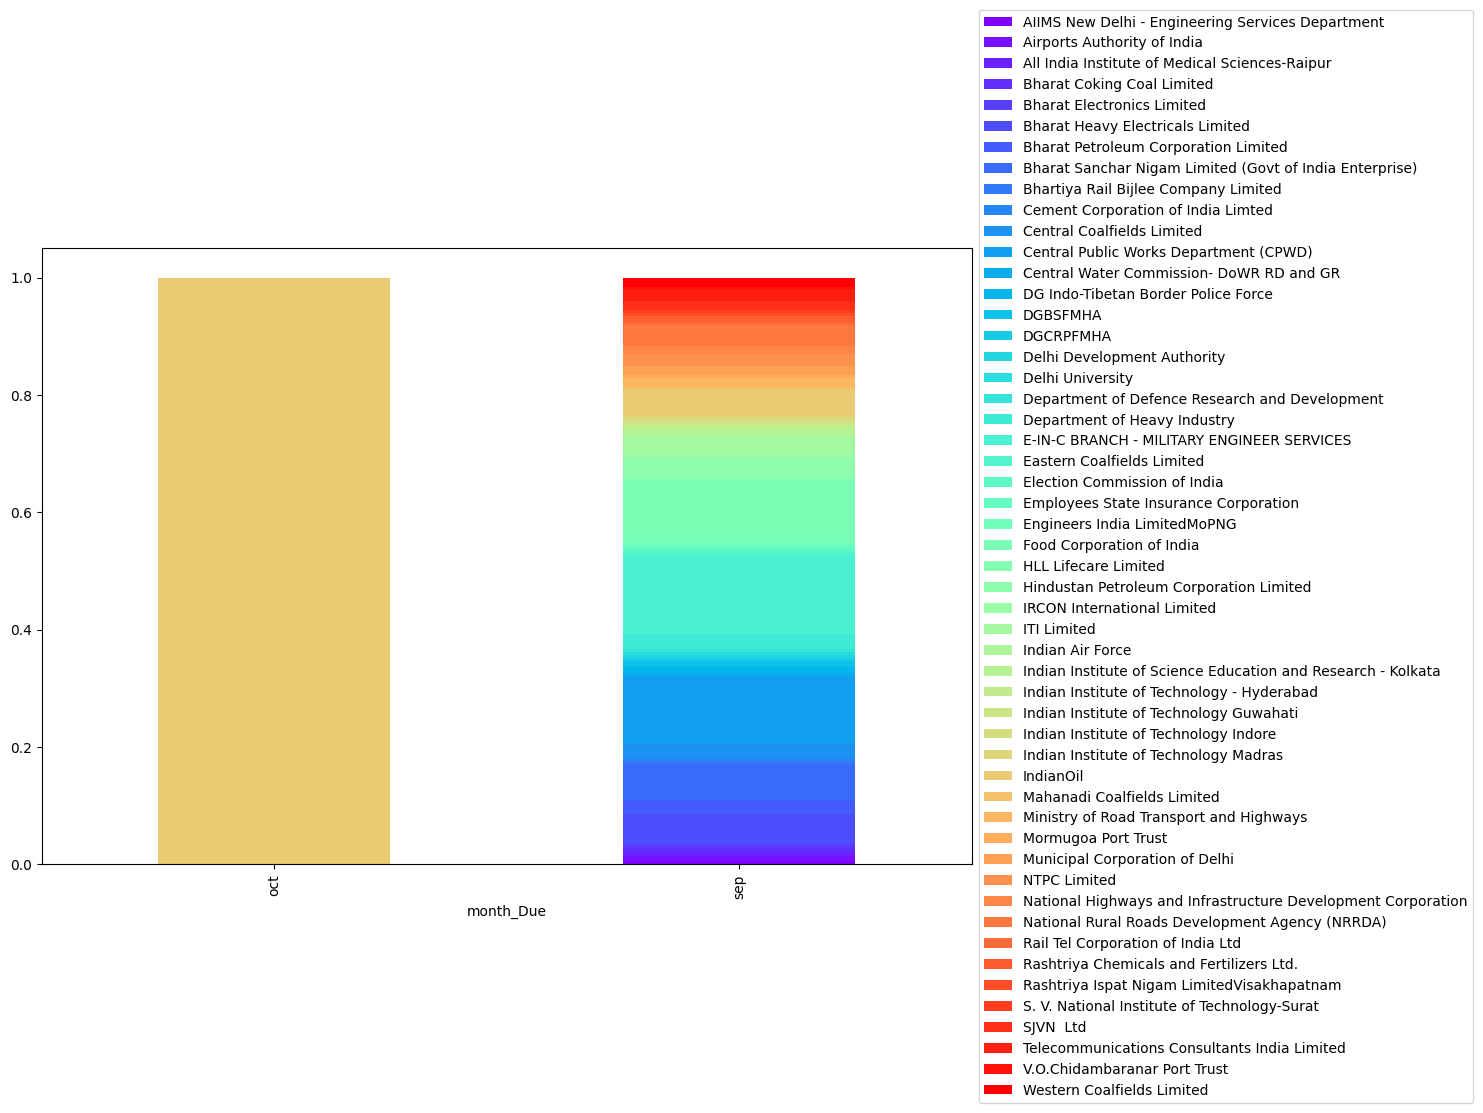

In [117]:
ctab.plot(kind='bar', stacked=True, colormap='rainbow', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [118]:
########
data2.head(8)

,Sl.No,e-Published Date,Bid Submission Closing Date,Tender Opening Date,Title/Ref.No./Tender Id,Organisation Name,Corrigendum,month_published,month_Due
0,1.,2023-09-01 18:00:00,2023-09-12 12:00:00,13-Sep-2023 12:00 PM,DE/CNTx/KPR/T-2/Vol-14/110 (KM-1) dtd 01.09.23...,Bharat Sanchar Nigam Limited (Govt of India En...,,sep,sep
1,2.,2023-09-01 17:00:00,2023-09-08 13:00:00,08-Sep-2023 02:00 PM,Providing laying jointing testing of 150 mm ...,SJVN Ltd,,sep,sep
2,3.,2023-08-31 18:30:00,2023-09-02 14:00:00,02-Sep-2023 02:30 PM,Unpacking of Panels/TGPWCC0006/2023_BHEL_28141_1,Bharat Heavy Electricals Limited,,aug,sep
3,4.,2023-08-31 18:19:00,2023-09-04 15:15:00,04-Sep-2023 03:30 PM,119-EEE-SJHED-2023-24-AEE-IV/119-EEE-SJHED-202...,Central Public Works Department (CPWD),,aug,sep
4,5.,2023-08-31 18:08:00,2023-09-04 15:05:00,04-Sep-2023 03:30 PM,118-EEE-SJHED-2023-24-AEE-IV/118-EEE-SJHED-202...,Central Public Works Department (CPWD),,aug,sep
5,6.,2023-08-31 17:23:00,2023-09-08 15:00:00,08-Sep-2023 03:30 PM,88/EE(E)/GCED/2023-24/88/EE(E)/GCED/2023-24/52550,Central Public Works Department (CPWD),,aug,sep
6,7.,2023-08-31 17:00:00,2023-09-21 15:00:00,22-Sep-2023 03:00 PM,Licence for Sim Card Kiosk inside Internationa...,Airports Authority of India,,aug,sep
7,8.,2023-08-31 16:51:00,2023-09-14 15:00:00,14-Sep-2023 03:30 PM,05/EE-cum-SM(C)-1/DPC-1/2023-24/05/EE-cum-SM(C...,Central Public Works Department (CPWD),,aug,sep


In [119]:
print(unique_dept)

['Bharat Sanchar Nigam Limited (Govt of India Enterprise)', 'SJVN  Ltd', 'Bharat Heavy Electricals Limited', 'Central Public Works Department (CPWD)', 'Airports Authority of India', 'Bharat Coking Coal Limited', 'National Rural Roads Development Agency (NRRDA)', 'DGBSFMHA', 'Telecommunications Consultants India Limited', 'NTPC Limited', 'Bharat Electronics Limited', 'IndianOil', 'Delhi University', 'Central Water Commission- DoWR RD and GR', 'E-IN-C BRANCH - MILITARY ENGINEER SERVICES', 'Mormugoa Port Trust', 'Indian Institute of Technology Indore', 'Municipal Corporation of Delhi', 'Department of Heavy Industry', 'Hindustan Petroleum Corporation Limited', 'Rashtriya Chemicals and Fertilizers Ltd.', 'Indian Institute of Technology Guwahati', 'ITI Limited', 'Department of Defence Research and Development', 'Central Coalfields Limited', 'Bharat Petroleum Corporation Limited', 'Indian Institute of Science Education and Research - Kolkata', 'Food Corporation of India', 'Rail Tel Corporatio

[Text(0, 15, '3'),
 Text(0, 15, '3'),
 Text(0, 15, '8'),
 Text(0, 15, '17'),
 Text(0, 15, '2'),
 Text(0, 15, '1'),
 Text(0, 15, '4'),
 Text(0, 15, '2'),
 Text(0, 15, '2'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '3'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '7'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '3'),
 Text(0, 15, '2'),
 Text(0, 15, '4'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '3'),
 Text(0, 15, '1'),
 Text(0, 15, '3'),
 Text(0, 15, '2'),
 Text(0, 15, '2'),
 Text(0, 15, '13'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1'),
 Text(0, 15, '1')]

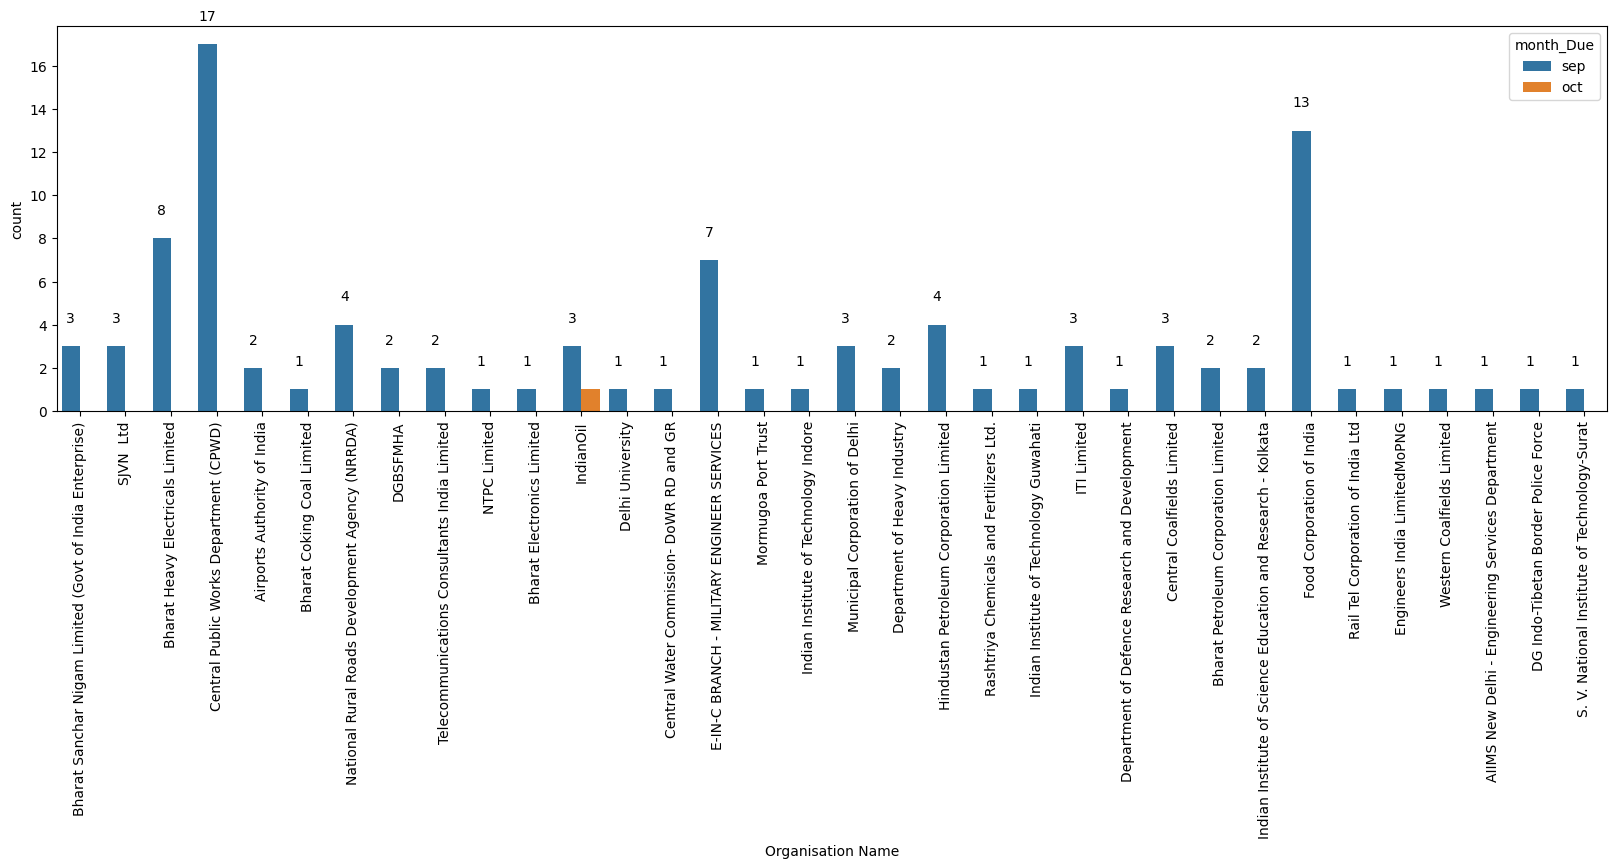

In [120]:
# To plot no of count Vs element of 1 column (i.e department)   :  ( count vs elements of 1 particulaer column)

fig,ax=plt.subplots(figsize=(20,5))
data3=data2.head(100)
barchart=sns.countplot(x='Organisation Name',hue='month_Due',data=data3)
ax.tick_params(axis='x',rotation=90)

barchart.bar_label(ax.containers[0], label_type='edge', padding=15)  # use to show lable on top of bar



In [121]:
## eg

list1=[1,2,3,4]
print(enumerate(list1))
list2=[]
for i in enumerate(list1):
  #list2=[]
  list2.append(i)
print(list2)
#print(list(enumerate(unique_dept)))
#for i in enumerate(unique_dept):
  #print(i)

[(0, 1), (1, 2), (2, 3), (3, 4)]


In [122]:
# list of column with index position
columns_list=[]
for i in enumerate(data2.columns):
  columns_list.append(i)
print(columns_list)



[(0, 'Sl.No'), (1, 'e-Published Date'), (2, 'Bid Submission Closing Date'), (3, 'Tender Opening Date'), (4, 'Title/Ref.No./Tender Id'), (5, 'Organisation Name'), (6, 'Corrigendum'), (7, 'month_published'), (8, 'month_Due')]


<ipython-input-123-3a2456a0271e>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i[0]+1)  #   3(row)x3(column)=9 & i[0]+1 always smaller than 9


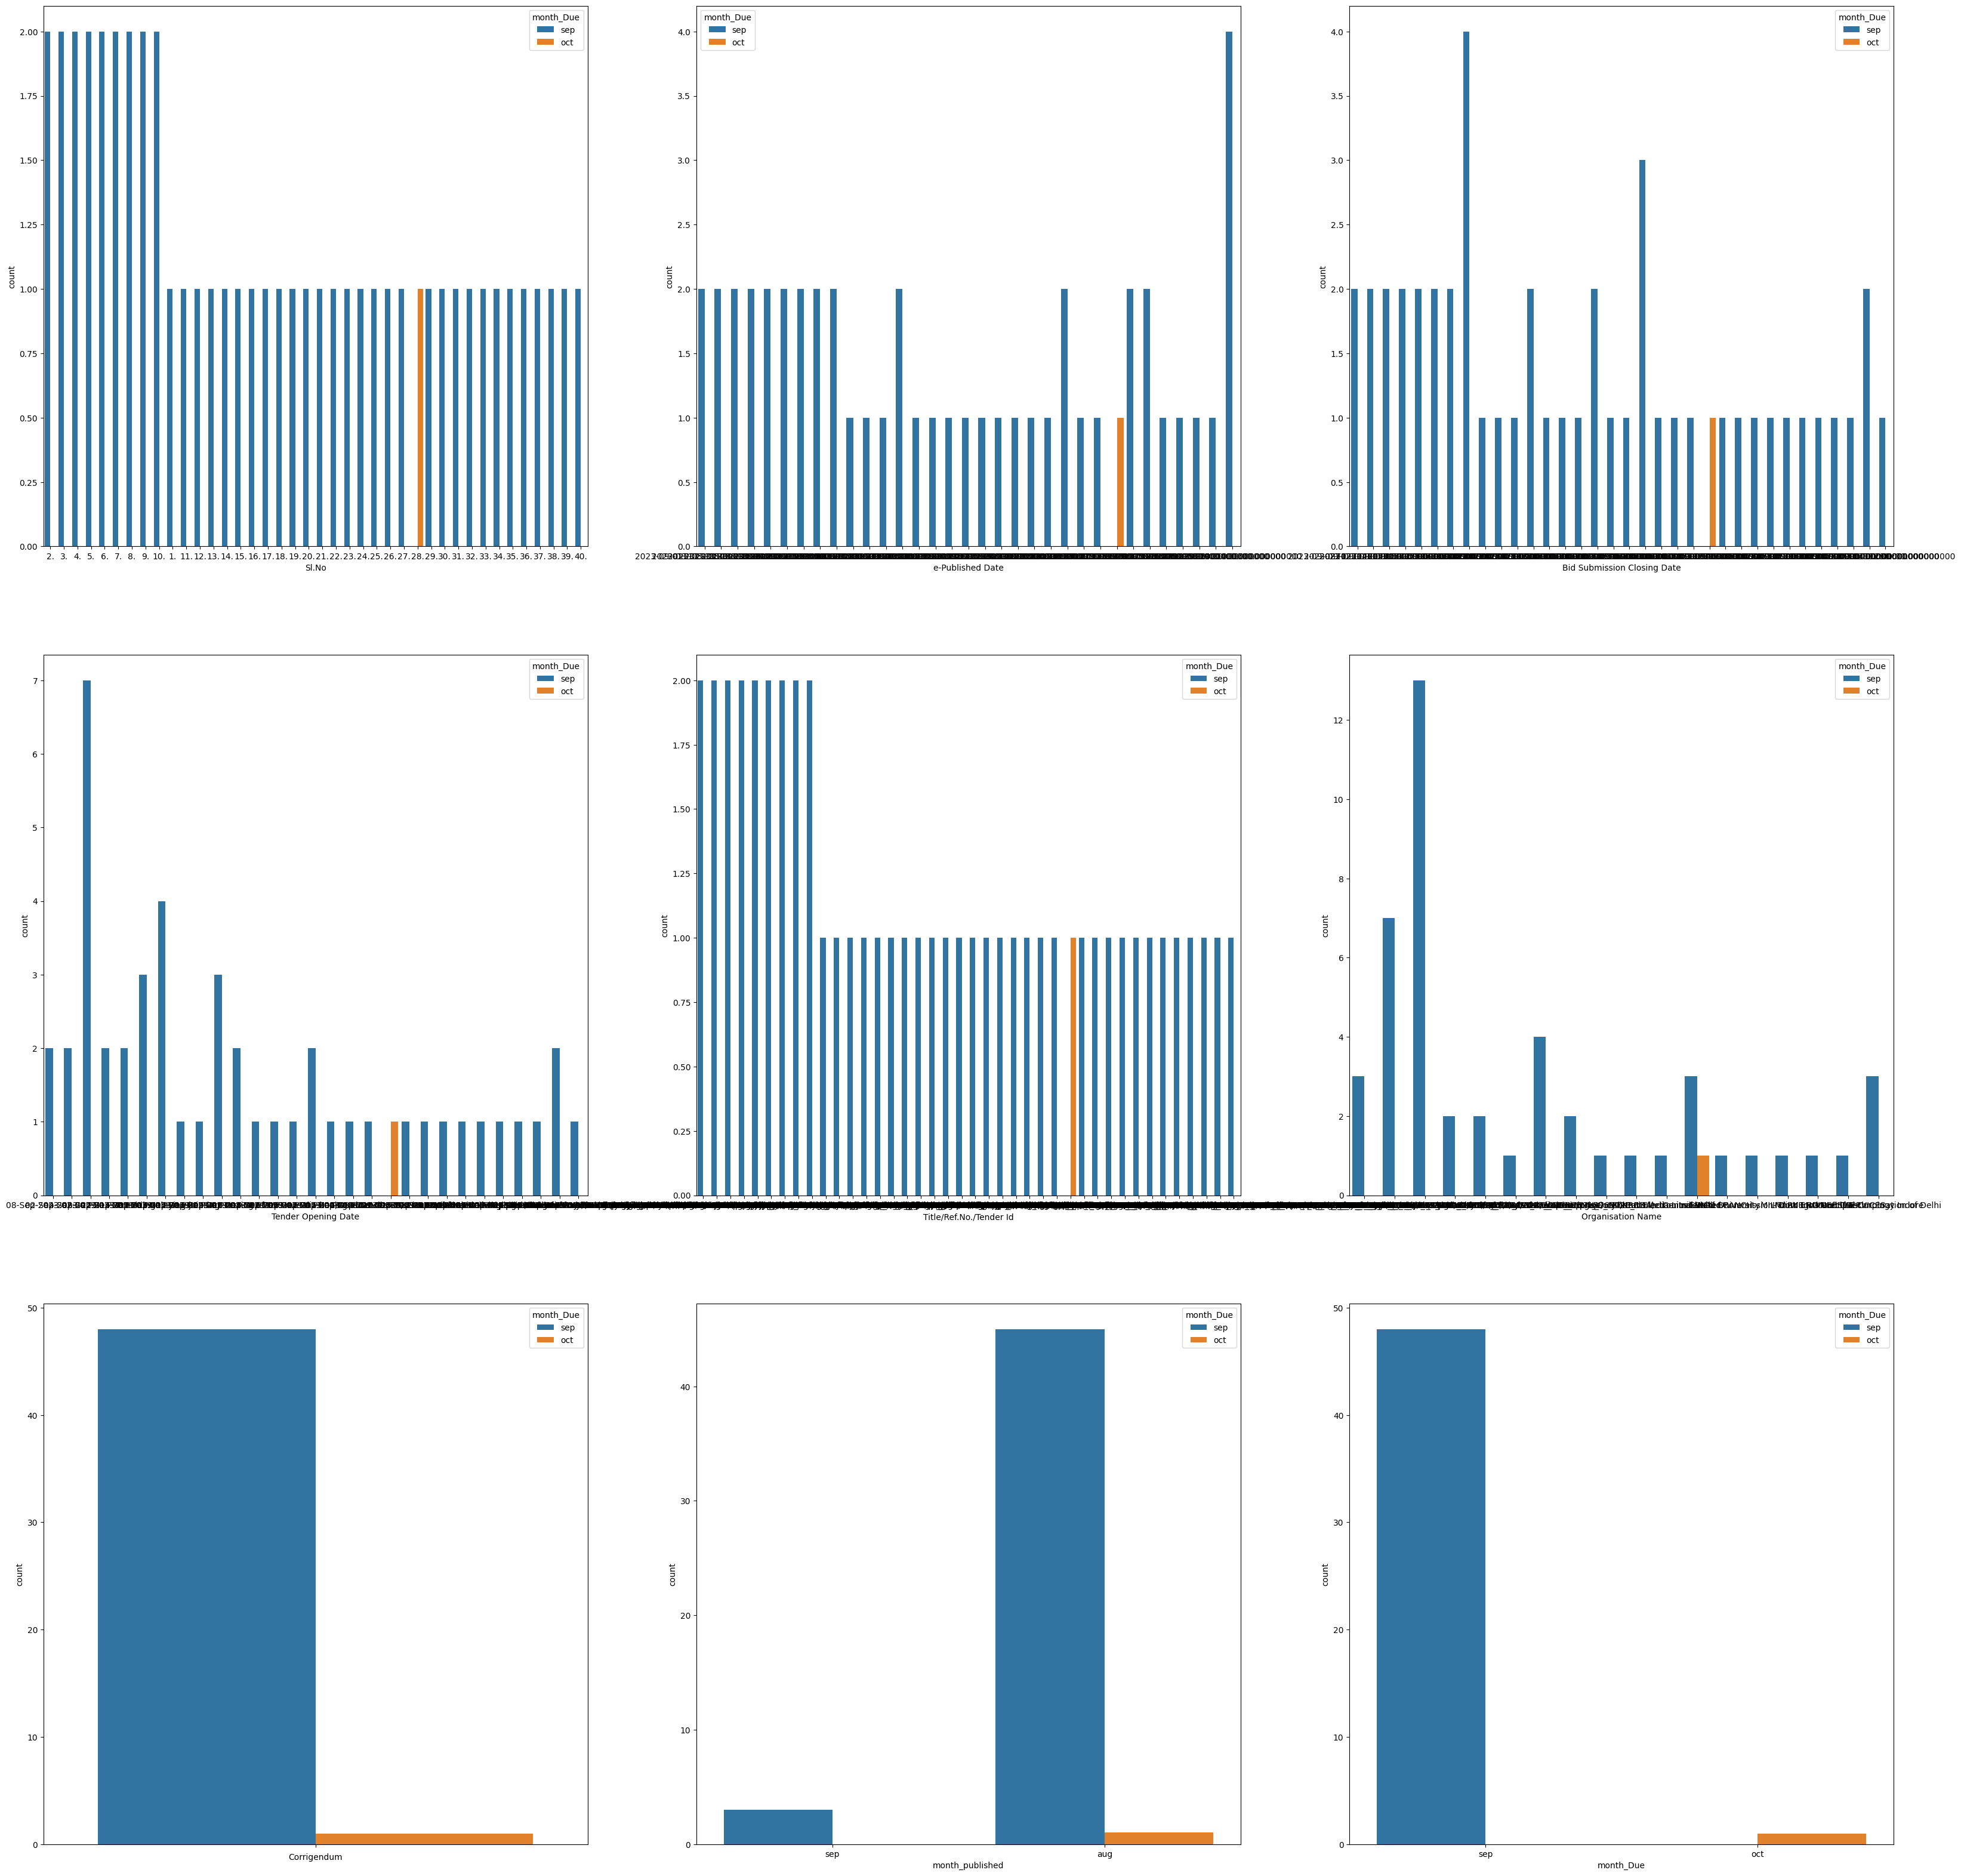

In [123]:
#  To plot no of count Vs element of all column ( count vs elements of all column)

#  https://www.youtube.com/watch?v=4DnWYK88-E4



fig,ax=plt.subplots(figsize=(40,40))
ax.tick_params(axis='x',rotation=65)
for i in columns_list:
  plt.subplot(3,3,i[0]+1)  #   3(row)x3(column)=9 & i[0]+1 always smaller than 9
  sns.countplot(x=i[1],hue='month_Due',data=data2[1:50])





In [124]:
########## 2nd method for all row but not working

In [125]:
data1=pd.DataFrame(columns=list)
data1.loc[0]=['A','B','C','D','E','F','G']
data1

,Sl.No,e-Published Date,Bid Submission Closing Date,Tender Opening Date,Title/Ref.No./Tender Id,Organisation Name,Corrigendum
0,A,B,C,D,E,F,G


In [126]:
url_list=[]
for N in range(0,3):
  url='https://eprocure.gov.in/cppp/latestactivecorrigendumsnew/cpppdata?page='+str(N)
  url_list.append(url)
print(url_list)

['https://eprocure.gov.in/cppp/latestactivecorrigendumsnew/cpppdata?page=0', 'https://eprocure.gov.in/cppp/latestactivecorrigendumsnew/cpppdata?page=1', 'https://eprocure.gov.in/cppp/latestactivecorrigendumsnew/cpppdata?page=2']


In [127]:

for k in url_list:

  import urllib.request as re
  html=re.urlopen(k)
  soup=BeautifulSoup(html,'lxml')
  rows=soup.findAll('tr')[1:]
  #list2=[]
  for z in range(0,10):
    list2=[]
    row=rows[z].findAll('td')
    for p in row:
        td_row=p.text.replace(',','')
        #print(td_row)
        list2.append(td_row)
          #print(list2)
    data.loc[z]=list2
  #data3=data1.append(data)
data
#data1.append(data)
#data3


,Sl.No,e-Published Date,Bid Submission Closing Date,Tender Opening Date,Title/Ref.No./Tender Id,Organisation Name,Corrigendum
0,11.,31-Aug-2023 11:00 AM,11-Sep-2023 11:00 AM,12-Sep-2023 11:00 AM,Construction of one classroom and two classroo...,Bharat Coking Coal Limited,
1,12.,31-Aug-2023 09:30 AM,11-Sep-2023 12:00 PM,11-Sep-2023 03:00 PM,Construction and Upgradation of Roads under Pr...,National Rural Roads Development Agency (NRRDA),
2,13.,31-Aug-2023 09:00 AM,07-Sep-2023 06:00 PM,09-Sep-2023 12:00 PM,C/O Advance FRP structures for Ors living 16 t...,DGBSFMHA,
3,14.,31-Aug-2023 09:00 AM,07-Sep-2023 06:00 PM,09-Sep-2023 12:00 PM,C/O 05 Nos Advance FRP toilet alongwith 6 heat...,DGBSFMHA,
4,15.,30-Aug-2023 06:55 PM,13-Sep-2023 03:00 PM,14-Sep-2023 03:30 PM,Selection of Consultant for Design DPR prepara...,Telecommunications Consultants India Limited,
5,16.,30-Aug-2023 06:30 PM,15-Sep-2023 04:00 PM,18-Sep-2023 06:00 PM,Centralized Rate Contract of Cooling Water Tre...,NTPC Limited,
6,17.,30-Aug-2023 05:00 PM,06-Sep-2023 01:00 PM,06-Sep-2023 02:00 PM,Special repair and maintenance of type III (8 ...,SJVN Ltd,
7,18.,30-Aug-2023 03:47 PM,06-Sep-2023 04:00 PM,06-Sep-2023 05:00 PM,35/2023-24/AE/BCSD1/II/Bangalore/35/2023-24/AE...,Central Public Works Department (CPWD),
8,19.,30-Aug-2023 03:35 PM,06-Sep-2023 03:45 PM,06-Sep-2023 04:30 PM,34/2023-24/AE/BCSD1/II/Bangalore/34/2023-24/AE...,Central Public Works Department (CPWD),
9,20.,30-Aug-2023 02:39 PM,06-Sep-2023 04:00 PM,06-Sep-2023 04:30 PM,03/EE/AE-II/SSKHD/2023-24/03/EE/AE-II/SSKHD/20...,Central Public Works Department (CPWD),


In [128]:
'''k=264

import urllib.request as re
url='https://eprocure.gov.in/cppp/latestactivecorrigendumsnew/cpppdata?page='+str(k)
html=re.urlopen(url)
soup=BeautifulSoup(html,'lxml')
rows=soup.findAll('tr')[1:]
  #list2=[]
for z in range(0,10):
  list2=[]
  row=rows[z].findAll('td')
  for p in row:
      td_row=p.text.replace(',','')
      #print(td_row)
      list2.append(td_row)
        #print(list2)
  data.loc[z]=list2
data3=data1.append(data)
data3
#data1.append(data)
#data1'''


"k=264\n\nimport urllib.request as re\nurl='https://eprocure.gov.in/cppp/latestactivecorrigendumsnew/cpppdata?page='+str(k)\nhtml=re.urlopen(url)\nsoup=BeautifulSoup(html,'lxml')\nrows=soup.findAll('tr')[1:]\n  #list2=[]\nfor z in range(0,10):\n  list2=[]\n  row=rows[z].findAll('td')\n  for p in row:\n      td_row=p.text.replace(',','')\n      #print(td_row)\n      list2.append(td_row)\n        #print(list2)\n  data.loc[z]=list2\ndata3=data1.append(data)\ndata3\n#data1.append(data)\n#data1"